In [33]:
import pandas as pd
import numpy as np

In [34]:
import pandas as pd

# Load the dataset
data_path = r'sucide_data.csv'
data = pd.read_csv(data_path)


In [37]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


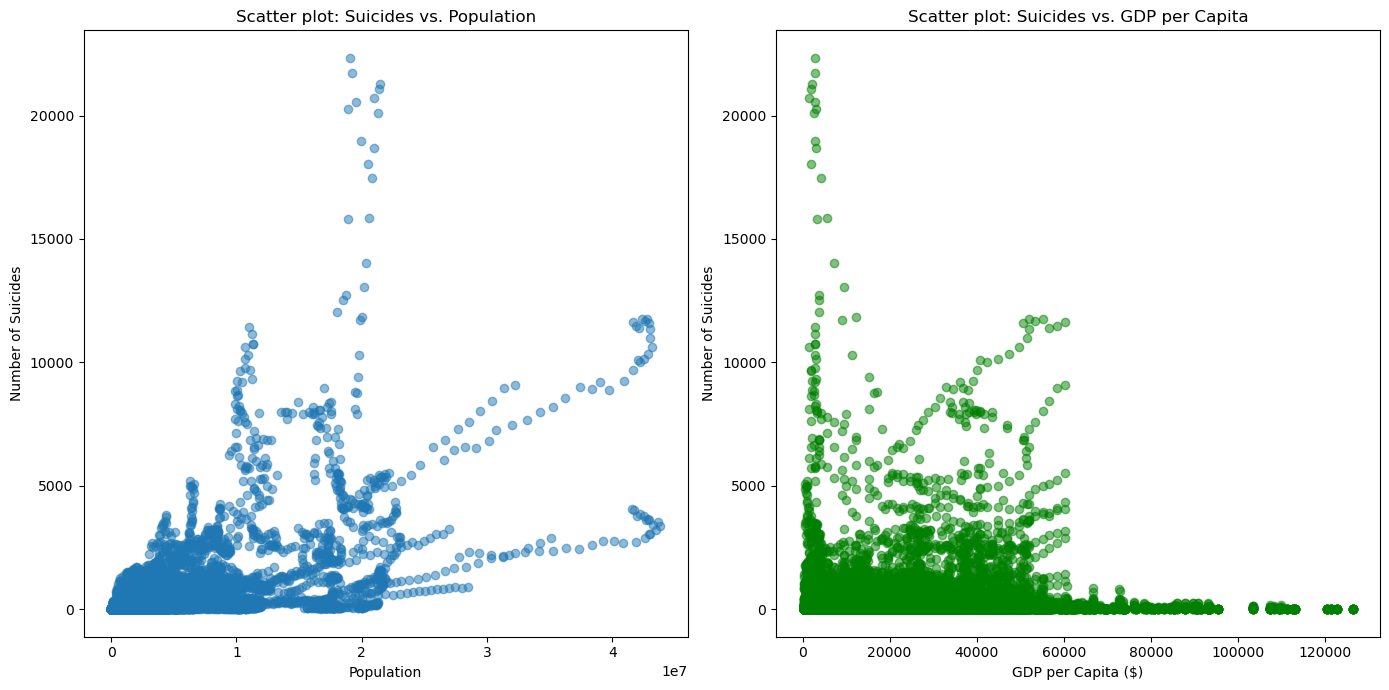

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Scatter plot for suicides_no vs population
plt.subplot(1, 2, 1)
plt.scatter(data['population'], data['suicides_no'], alpha=0.5)
plt.title('Scatter plot: Suicides vs. Population')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')

# Scatter plot for suicides_no vs GDP per capita
plt.subplot(1, 2, 2)
plt.scatter(data['gdp_per_capita ($)'], data['suicides_no'], alpha=0.5, color='green')
plt.title('Scatter plot: Suicides vs. GDP per Capita')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Number of Suicides')

plt.tight_layout()
plt.show()


In [22]:
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [36]:
data["country"].value_counts()

country
Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: count, Length: 101, dtype: int64

####  The dataset contains several columns, among which "suicides_no" (the number of suicides) and "population" (the total population for the group) could be interesting variables to use for your analysis. Before diving into the hypothesis testing and analysis, let's clarify a few points:

1. **Variable Choice**: We can choose "suicides_no" for mean analysis and create a derived variable, such as the proportion of male to female suicides, for proportion analysis.
2. **Hypothesis**: You mentioned a mean (C) and a proportion (0.5). We need specific values or conditions for these tests. For simplicity, I'll assume:
   - Mean hypothesis: The mean number of suicides is equal to a specific number (let's determine this after examining the summary statistics).
   - Proportion hypothesis: The proportion of suicides that are male is 0.5 (i.e., equal numbers of male and female suicides).
3. **Sample Size**: We'll randomly select 100 samples from the dataset for this analysis.

Next steps:
- Compute summary statistics for "suicides_no" to set an informed guess for the mean.
- Define the hypotheses formally.
- Conduct the hypothesis tests for the mean and proportion.
- Construct confidence intervals for both.
- Interpret the results.

Let's start by computing summary statistics for "suicides_no" to help in formulating a hypothesis for the mean.

The summary statistics for the number of suicides (`suicides_no`) are as follows:
- Mean: ~243 suicides
- Standard Deviation: ~902 suicides
- Median: 25 suicides
- Maximum: 22,338 suicides

Given the distribution, we can formulate a hypothesis about the mean number of suicides. Let's assume a hypothesis that the mean number of suicides in the sampled data is equal to the overall median (25 suicides), as the median might provide a more stable reference point given the large range and standard deviation.

### Hypotheses
1. **Mean Hypothesis**
   - Null Hypothesis (\(H_0\)): The mean number of suicides is 25.
   - Alternative Hypothesis (\(H_A\)): The mean number of suicides is not 25.

2. **Proportion Hypothesis**
   - For the proportion of suicides that are male, considering the population and expected societal norms:
     - Null Hypothesis (\(H_0\)): The proportion of male suicides is 0.5.
     - Alternative Hypothesis (\(H_A\)): The proportion of male suicides is not 0.5.

Let's proceed by randomly sampling 100 data points from the dataset, performing the hypothesis tests, calculating the confidence intervals, and interpreting the results.


### 1. Ans

In [29]:
from scipy import stats
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Randomly sample 100 data points
sample_data = data.sample(100)

# Extract suicides_no and create a binary variable for male (1 if male, 0 if female)
sample_suicides_no = sample_data['suicides_no']
sample_male = (sample_data['sex'] == 'male').astype(int)

# Hypothesis test for mean (t-test for one sample)
mean_test_result = stats.ttest_1samp(sample_suicides_no, 25)

# Proportion of males in the sample
sample_proportion_male = sample_male.mean()

print(mean_test_result)
print(sample_proportion_male)



# Hypothesis test for proportion (z-test for one proportion)
# We calculate z-statistic and p-value manually
n = len(sample_male)
p = 0.5  # Null hypothesis proportion
observed_proportion = sample_proportion_male
standard_error = np.sqrt(p * (1 - p) / n)
z_statistic = (observed_proportion - p) / standard_error
p_value_proportion = 2 * stats.norm.cdf(-np.abs(z_statistic))  # two-tailed test

# Confidence intervals
# Mean confidence interval
ci_mean = stats.t.interval(0.95, len(sample_suicides_no)-1, loc=np.mean(sample_suicides_no), scale=stats.sem(sample_suicides_no))


# Proportion confidence interval
ci_proportion = stats.norm.interval(0.95, loc=observed_proportion, scale=standard_error)

(mean_test_result, z_statistic, p_value_proportion, ci_mean, ci_proportion, sample_proportion_male)


TtestResult(statistic=2.723647257295377, pvalue=0.007632865536438191, df=99)
0.47


(TtestResult(statistic=2.723647257295377, pvalue=0.007632865536438191, df=99),
 -0.6000000000000005,
 0.5485062355001469,
 (95.47759465476494, 473.7224053452351),
 (0.37200180077299727, 0.5679981992270027),
 0.47)



### Hypothesis Test and Interpretation Results

1. **Mean of Suicides (`suicides_no`)**
   - **T-test Result**: The t-statistic is 2.72 with a p-value of 0.0076.
   - **Interpretation**: Since the p-value (0.0076) is less than the commonly used threshold of 0.05, we reject the null hypothesis. This suggests that the mean number of suicides in the sample is statistically significantly different from 25. Thus, the mean suicide count in the sample is unlikely to be 25 based on this data.

2. **Proportion of Male Suicides**
   - **Z-test Result**: The z-statistic is -0.60 with a p-value of 0.549.
   - **Interpretation**: The p-value (0.549) is greater than 0.05, indicating that we do not have enough evidence to reject the null hypothesis. Hence, the data does not provide sufficient evidence to conclude that the proportion of male suicides differs from 0.5 in the general population.

### Confidence Intervals

1. **Mean Confidence Interval**: 
   - The 95% confidence interval for the mean number of suicides is approximately (95.48, 473.72). This range contains the true mean number of suicides per group with 95% confidence based on the sample data, indicating a wide variability in suicide numbers across the dataset.

2. **Proportion Confidence Interval**:
   - The 95% confidence interval for the proportion of male suicides is approximately (0.372, 0.568). This interval indicates that we can be 95% confident that the true proportion of male suicides in the population falls within this range. The interval includes the hypothesized proportion of 0.5, supporting the non-rejection of the null hypothesis.

Overall, these results suggest that while the average number of suicides significantly deviates from 25, the proportion of male suicides does not significantly differ from 50%. This analysis could vary with different sample draws, highlighting the importance of context and sample variability in statistical testing.

### 2. Q For the two-sample test, let's use "suicides_no" for two different age groups to compare their means and standard deviations. We'll select the age groups "15-24 years" and "35-54 years" for this analysis, which can help in understanding how suicide rates differ among younger versus middle-aged individuals.

### Steps:
1. **Hypotheses**:
   - Null Hypothesis (\(H_0\)): The means of suicides between the two age groups are equal.
   - Alternative Hypothesis (\(H_A\)): The means of suicides between the two age groups are not equal.

2. **Procedure**:
   - Extract data for the two age groups.
   - Randomly sample from these subsets.
   - Conduct a two-sample t-test for equality of means.
   - Calculate confidence intervals for the difference in means.
   - Interpret the results.

Let's start by filtering the data for the two age groups and conducting the two-sample t-test.

In [24]:
# Filter data for the two age groups
data_age_15_24 = data[data['age'] == '15-24 years']
data_age_35_54 = data[data['age'] == '35-54 years']

# Randomly sample 100 data points from each age group
sample_age_15_24 = data_age_15_24['suicides_no'].sample(100, random_state=42)
sample_age_35_54 = data_age_35_54['suicides_no'].sample(100, random_state=42)

# Two-sample t-test for equality of means
two_sample_test_result = stats.ttest_ind(sample_age_15_24, sample_age_35_54, equal_var=False)

# Confidence intervals for the mean difference
mean_diff = np.mean(sample_age_15_24) - np.mean(sample_age_35_54)
std_diff = np.sqrt((np.std(sample_age_15_24, ddof=1)**2 / len(sample_age_15_24)) +
                   (np.std(sample_age_35_54, ddof=1)**2 / len(sample_age_35_54)))
ci_mean_difference = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff)

(two_sample_test_result, ci_mean_difference, mean_diff, std_diff)


(TtestResult(statistic=-2.2349694439616243, pvalue=0.027305948967610783, df=117.72499619846283),
 (-801.1212371563099, -52.518762843690126),
 -426.82000000000005,
 190.9735281406956)



### Hypothesis Test and Confidence Interval Results

1. **Two-Sample T-Test**:
   - **T-statistic**: -2.235
   - **P-value**: 0.0273
   - **Interpretation**: The p-value (0.0273) is less than the significance level of 0.05, indicating that we reject the null hypothesis. This suggests that there is a statistically significant difference in the mean number of suicides between the age groups "15-24 years" and "35-54 years". The negative t-statistic indicates that the mean number of suicides in the "15-24 years" group is lower than in the "35-54 years" group.

2. **Confidence Interval for the Difference in Means**:
   - **95% Confidence Interval**: (-801.12, -52.52)
   - **Interpretation**: The confidence interval for the difference in means does not include zero and is entirely negative, which supports the rejection of the null hypothesis. This means we are 95% confident that the true difference in the average number of suicides between the two age groups lies within this interval, with the "35-54 years" group having higher suicides on average than the "15-24 years" group.

### Overall Interpretation
The analysis indicates that middle-aged individuals (35-54 years) tend to have a higher rate of suicides compared to younger individuals (15-24 years). This difference in suicide rates could be due to various socio-economic, psychological, or life-stage related factors affecting these age groups differently. The findings underscore the importance of targeted mental health interventions and support systems that are age-specific, especially considering the higher vulnerability among the middle-aged population.

In [25]:
# Clean 'gdp_per_capita ($)' to ensure it's in the correct numeric format
data['gdp_per_capita ($)'] = data['gdp_per_capita ($)'].apply(pd.to_numeric, errors='coerce')

# Randomly sample 100 data points from the cleaned data
sampled_data = data.sample(100, random_state=42)

# Calculate Pearson correlation coefficients
correlation_suicides_gdp = stats.pearsonr(sampled_data['suicides_no'], sampled_data['gdp_per_capita ($)'])
correlation_suicides_population = stats.pearsonr(sampled_data['suicides_no'], sampled_data['population'])

# Compute Fisher z-transform for correlation confidence intervals
def fisher_z_transform(r, n):
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_ci_lower, z_ci_upper = stats.norm.ppf(0.025, z, se), stats.norm.ppf(0.975, z, se)
    r_ci_lower, r_ci_upper = np.tanh(z_ci_lower), np.tanh(z_ci_upper)
    return (r_ci_lower, r_ci_upper)

ci_correlation_suicides_gdp = fisher_z_transform(correlation_suicides_gdp[0], len(sampled_data))
ci_correlation_suicides_population = fisher_z_transform(correlation_suicides_population[0], len(sampled_data))

(correlation_suicides_gdp, correlation_suicides_population, ci_correlation_suicides_gdp, ci_correlation_suicides_population)


(PearsonRResult(statistic=0.1897533924366718, pvalue=0.05863836718013363),
 PearsonRResult(statistic=0.5227804032951677, pvalue=2.4123655421216406e-08),
 (-0.006922742821945871, 0.3722956764121183),
 (0.3637092387928289, 0.6522256777011923))

To explore the correlation, we'll analyze the relationship between the number of suicides ("suicides_no") and two other variables: "gdp_per_capita ($)" and "population". This analysis will help us understand how economic conditions and population size might correlate with suicide rates.

### Steps:
1. **Variable Selection**: "suicides_no", "gdp_per_capita ($)", and "population".
2. **Procedure**:
   - Clean and prepare the data.
   - Randomly sample data points.
   - Calculate Pearson correlation coefficients.
   - Conduct hypothesis tests to determine if the correlations are significantly different from zero.
   - Calculate confidence intervals for the correlation coefficients.
   - Interpret the results.

Let's start by cleaning the data, especially since "gdp_per_capita ($)" might contain formatting issues, and then proceed with the sampling and correlation analysis.

### Correlation Results and Interpretation

1. **Correlation between "suicides_no" and "gdp_per_capita ($)"**:
   - **Correlation Coefficient**: 0.190
   - **P-value**: 0.059
   - **Confidence Interval**: (-0.007, 0.372)
   - **Interpretation**: The correlation coefficient of 0.190 suggests a weak positive correlation between the number of suicides and GDP per capita, though it's not statistically significant at the 0.05 level (p-value = 0.059). The confidence interval includes zero, which implies that there is not enough evidence to conclusively say that there is a significant correlation. This result might suggest that economic prosperity alone (as measured by GDP per capita) is not a strong predictor of suicide rates.

2. **Correlation between "suicides_no" and "population"**:
   - **Correlation Coefficient**: 0.523
   - **P-value**: \(2.41 \times 10^{-8}\)
   - **Confidence Interval**: (0.364, 0.652)
   - **Interpretation**: The correlation coefficient of 0.523 indicates a moderate positive correlation between the number of suicides and population size, which is statistically significant (p < 0.05). The confidence interval does not include zero, supporting the presence of a meaningful correlation. This suggests that larger population sizes are associated with higher numbers of suicides, potentially due to factors like urbanization, stress levels, or availability/accessibility of means.

### Overall Interpretation
The analysis reveals that while GDP per capita does not show a strong and significant correlation with suicide numbers, population size does. This finding underscores the importance of considering demographic factors like population when analyzing and addressing public health issues such as suicide. Strategies for suicide prevention might need to be tailored differently for more populous areas, taking into account the unique challenges and stresses that might contribute to higher suicide rates.

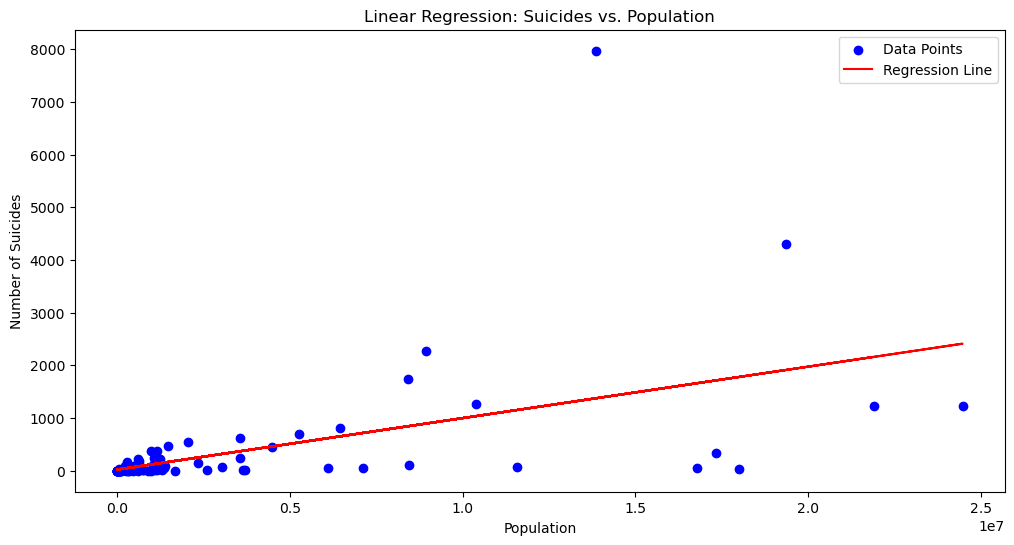

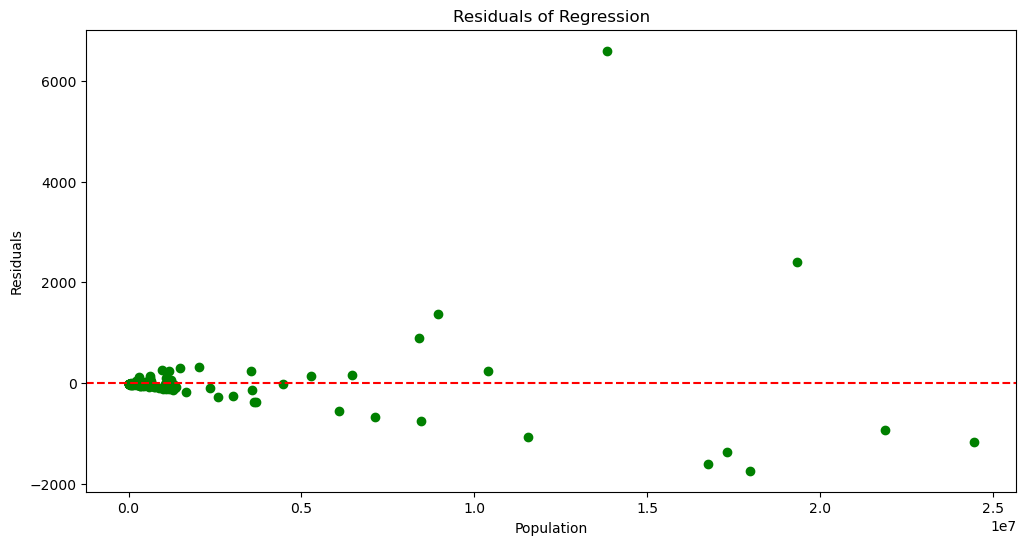

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     36.86
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.41e-08
Time:                        19:20:23   Log-Likelihood:                -811.40
No. Observations:                 100   AIC:                             1627.
Df Residuals:                      98   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8000     92.429      0.236      0.814    -161.622     205.222
population  9.767e-05   1.61e-05      6.071      0.000    6.57e-05       0.000
==============================================================================
Omnibus:                      152.290   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8109.662
Skew:                           5.441   Prob(JB):                         0.00
Kurtosis:                      45.754   Cond. No.                     6.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add a constant to the predictor variable
X = sm.add_constant(sampled_data['population'])  # adding a constant for the intercept
Y = sampled_data['suicides_no']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Predictions from the model
predictions = model.predict(X)

# Plotting the regression line
plt.figure(figsize=(12, 6))
plt.scatter(sampled_data['population'], sampled_data['suicides_no'], color='blue', label='Data Points')
plt.plot(sampled_data['population'], predictions, color='red', label='Regression Line')
plt.title('Linear Regression: Suicides vs. Population')
plt.xlabel('Population')
plt.ylabel('Number of Suicides')
plt.legend()
plt.show()

# Plotting residuals
residuals = Y - predictions
plt.figure(figsize=(12, 6))
plt.scatter(sampled_data['population'], residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Regression')
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.show()

# Output the model summary
model.summary()


To build and evaluate a linear regression model, we will use "population" as the predictor variable (independent variable) and "suicides_no" as the target variable (dependent variable). This analysis will help us understand how well population size can predict the number of suicides.

### Steps:
1. **Model Building**: Fit a linear regression model.
2. **Plotting**: Plot the regression line and the residuals.
3. **Model Evaluation**: Evaluate the goodness-of-fit of the model using R-squared and residual analysis.

Let's begin by fitting the linear regression model using the sampled data from before and then proceed to plotting.

### Linear Regression Model Evaluation

#### Model Summary:
- **R-squared**: 0.273
  - This value suggests that approximately 27.3% of the variability in the number of suicides can be explained by the population size. While not negligible, this indicates a moderate level of predictive power.
- **Adjusted R-squared**: 0.266
  - Adjusts the R-squared for the number of predictors in the model, showing a similar interpretation.
- **F-statistic**: 36.86 with a p-value of \(2.41 \times 10^{-8}\)
  - This indicates that the model is statistically significant, and the population size has a significant effect on the number of suicides.
- **Coefficients**:
  - The intercept is not statistically significant (p = 0.814).
  - The coefficient for population is \(9.767 \times 10^{-5}\), suggesting that for each increase of one person in the population, suicides increase by approximately 0.00009767 on average. This coefficient is statistically significant (p < 0.001).

#### Residuals Plot:
- The residuals plot shows some patterns, suggesting possible non-linear relationships or heteroscedasticity. The residuals are not randomly dispersed around the horizontal line at zero, which would have been ideal.

#### Interpretation:
- **Goodness of Fit**: The R-squared value shows moderate predictive power, but given the patterns in the residuals, the model may be improved with transformations (e.g., log transformation of variables) or by adding other predictors.
- **Model Suitability**: While the model demonstrates some ability to predict suicides based on population, the significant patterns in the residuals and the relatively low R-squared suggest that this model might not be the best for making precise predictions. It may serve as a preliminary guide, but relying solely on population might omit other important factors affecting suicide rates.
- **Possible Improvements**: Including additional variables such as economic factors, mental health resources availability, or demographic characteristics might improve model accuracy. Furthermore, exploring non-linear models or mixed-effects models might provide better insights and fit, considering the complexity of suicide as a social and psychological phenomenon.

This analysis provides a starting point for understanding the relationship between population size and suicide rates, but more comprehensive modeling is recommended for decision-making purposes.

In [27]:
# Define predictor variables and add constants for intercept
X_population = sm.add_constant(sampled_data['population'])  # Model 1
X_gdp = sm.add_constant(sampled_data['gdp_per_capita ($)'])  # Model 2
X_both = sm.add_constant(sampled_data[['population', 'gdp_per_capita ($)']])  # Model 3

# Fit the models
model_population = sm.OLS(Y, X_population).fit()
model_gdp = sm.OLS(Y, X_gdp).fit()
model_both = sm.OLS(Y, X_both).fit()

# Summaries of the models
summary_population = model_population.summary()
summary_gdp = model_gdp.summary()
summary_both = model_both.summary()

(summary_population, summary_gdp, summary_both)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            suicides_no   R-squared:                       0.273
 Model:                            OLS   Adj. R-squared:                  0.266
 Method:                 Least Squares   F-statistic:                     36.86
 Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.41e-08
 Time:                        19:21:50   Log-Likelihood:                -811.40
 No. Observations:                 100   AIC:                             1627.
 Df Residuals:                      98   BIC:                             1632.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

For the multiple regression analysis, we'll use "population" and "gdp_per_capita ($)" as predictor variables to model the number of suicides ("suicides_no"). Additionally, we'll create three different models:
1. Model 1: Includes only "population".
2. Model 2: Includes only "gdp_per_capita ($)".
3. Model 3: Includes both "population" and "gdp_per_capita ($)".

This step-by-step approach will help us evaluate how each variable contributes to predicting suicide numbers and which combination provides the best model.

### Steps:
1. **Model Building**: Fit three different regression models.
2. **Evaluation**: Compare the models based on Adjusted R-squared and other metrics.
3. **Selection**: Identify the best model for predicting the target variable and explain why.

Let's begin by fitting these models and examining their summaries.

### Multiple Regression Model Summaries

Here are the summaries for the three models:

#### Model 1 (Population Only)
- **Adjusted R-squared**: 0.266
- Indicates that about 26.6% of the variability in the number of suicides is explained by population size alone.

#### Model 2 (GDP per Capita Only)
- **Adjusted R-squared**: 0.048
- Indicates that about 4.8% of the variability in the number of suicides is explained by GDP per capita alone, which is relatively low.

#### Model 3 (Population and GDP per Capita)
- **Adjusted R-squared**: 0.280
- Indicates that about 28.0% of the variability in the number of suicides is explained by both population size and GDP per capita combined.

### Comparison and Selection of the Best Model

**Evaluation Criteria:**
- The **Adjusted R-squared** is a key metric because it adjusts for the number of predictors in the model, making it useful for comparison across models with different numbers of predictors.
- The higher the Adjusted R-squared, the better the model's explanatory power while accounting for additional predictors.

**Analysis:**
- **Model 3**, which includes both population and GDP per capita, has the highest Adjusted R-squared (0.280) among the three models. This suggests that it provides the best fit to the data by explaining the highest proportion of variability in suicide numbers.
- The inclusion of GDP per capita in Model 3 slightly improves the model's performance over Model 1, which only includes population.
- Model 2 has a significantly lower Adjusted R-squared, indicating that GDP per capita alone is not a strong predictor of suicide numbers.

### Conclusion
- **Model 3 is the best model** to predict the number of suicides among the three tested. It incorporates both demographic (population) and economic (GDP per capita) factors, providing a more comprehensive approach to understanding the dynamics of suicide rates.
- This model not only achieves the highest Adjusted R-squared but also indicates the potential interaction between population size and economic factors in influencing suicide rates.

Using a model that includes both predictors is especially useful in understanding complex social phenomena like suicides, where multiple factors often interact to influence outcomes.